# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

# Load the Dataset

In [5]:
df = pd.read_csv("C:/Users/akank/Downloads/turkish_superleague_salaries.csv")
df.head()

,Player,Verified,Gross P/W (EUR),Gross P/Y (EUR),Bonus P/Y (EUR),Signed,Expiration,Years Remaining,Gross Remaining (EUR),Release Clause (EUR),Status,Pos.,Pos. Detail,Age,Country,Club
0,Rafa Silva,Yes,"€ 192,308","€ 10,000,000",NaN,"Jul 1, 2024","Jun 30, 2027",3,"€ 30,000,000",NaN,Starter,F,SS,31,Portugal,Besiktas
1,Victor Osimhen,Yes,"€ 192,308","€ 10,000,000",NaN,"Sep 4, 2024","Jun 30, 2025",1,"€ 10,000,000",NaN,Starter,F,CF,26,Nigeria,Galatasaray
2,Ciro Immobile,Yes,"€ 192,308","€ 10,000,000",NaN,"Jul 12, 2024","Jun 30, 2026",2,"€ 20,000,000",NaN,Starter,F,CF,34,Italy,Besiktas
3,Mauro Icardi,Yes,"€ 192,308","€ 10,000,000",NaN,"Jul 26, 2023","Jun 30, 2026",2,"€ 20,000,000",NaN,Reserve,F,CF,31,Argentina,Galatasaray
4,Milan Skriniar,Yes,"€ 144,231","€ 7,500,000",NaN,"Jan 30, 2025","Jun 30, 2025",1,"€ 7,500,000",NaN,Starter,D,CB,30,Slovakia,Fenerbahce


# Rename Columns for Clarity

In [6]:
df.columns = [
    "Player_Name", "Verified_Salary", "Weekly_Earning_EUR", "Yearly_Earning_EUR",
    "Bonus_Earning_EUR", "Signing_Date", "Expiration_Date", "Years_Remaining",
    "Gross_Remaining_EUR", "Release_Clause_EUR", "Status", "Position", "Position_Detail",
    "Age", "Country", "Club"
]


# Clean Currency Columns

In [7]:
def clean_currency(x):
    if pd.isna(x): return np.nan
    return float(str(x).replace("€", "").replace(",", "").strip())

currency_cols = ['Weekly_Earning_EUR', 'Yearly_Earning_EUR', 
                 'Bonus_Earning_EUR', 'Gross_Remaining_EUR', 'Release_Clause_EUR']

for col in currency_cols:
    df[col] = df[col].apply(clean_currency)

df['Years_Remaining'] = pd.to_numeric(df['Years_Remaining'], errors='coerce')
df['Signing_Date'] = pd.to_datetime(df['Signing_Date'], errors='coerce')
df['Expiration_Date'] = pd.to_datetime(df['Expiration_Date'], errors='coerce')


# Exploratory Data Analysis (EDA)
  Overview & Data Types

In [8]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Player_Name          541 non-null    object        
 1   Verified_Salary      541 non-null    object        
 2   Weekly_Earning_EUR   538 non-null    float64       
 3   Yearly_Earning_EUR   538 non-null    float64       
 4   Bonus_Earning_EUR    7 non-null      float64       
 5   Signing_Date         541 non-null    datetime64[ns]
 6   Expiration_Date      541 non-null    datetime64[ns]
 7   Years_Remaining      541 non-null    int64         
 8   Gross_Remaining_EUR  538 non-null    float64       
 9   Release_Clause_EUR   0 non-null      float64       
 10  Status               541 non-null    object        
 11  Position             541 non-null    object        
 12  Position_Detail      541 non-null    object        
 13  Age                  541 non-null  

,Player_Name,Verified_Salary,Weekly_Earning_EUR,Yearly_Earning_EUR,Bonus_Earning_EUR,Signing_Date,Expiration_Date,Years_Remaining,Gross_Remaining_EUR,Release_Clause_EUR,Status,Position,Position_Detail,Age,Country,Club
count,541,541,538.000000,5.380000e+02,7.000000e+00,541,541,541.000000,5.380000e+02,0.0,541,541,541,541.000000,541,541
unique,540,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,11,NaN,72,19
top,Emmanuel Boateng,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reserve,F,CB,NaN,Turkey,Galatasaray
freq,2,446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332,182,103,NaN,279,34
mean,NaN,NaN,17491.446097,9.095539e+05,1.127143e+06,2024-02-22 16:43:28.502772736,2026-10-22 17:36:42.587800576,2.314233,2.082974e+06,NaN,NaN,NaN,NaN,26.166359,NaN,NaN
min,NaN,NaN,577.000000,3.000000e+04,1.700000e+05,2019-11-01 00:00:00,2025-06-30 00:00:00,1.000000,3.000000e+04,NaN,NaN,NaN,NaN,15.000000,NaN,NaN
25%,NaN,NaN,3269.000000,1.700000e+05,5.500000e+05,2023-08-04 00:00:00,2025-06-30 00:00:00,1.000000,4.000000e+05,NaN,NaN,NaN,NaN,22.000000,NaN,NaN
50%,NaN,NaN,8269.000000,4.300000e+05,6.300000e+05,2024-07-01 00:00:00,2026-06-30 00:00:00,2.000000,8.400000e+05,NaN,NaN,NaN,NaN,26.000000,NaN,NaN
75%,NaN,NaN,17692.000000,9.200000e+05,1.330000e+06,2024-09-04 00:00:00,2027-06-30 00:00:00,3.000000,2.000000e+06,NaN,NaN,NaN,NaN,30.000000,NaN,NaN
max,NaN,NaN,192308.000000,1.000000e+07,3.330000e+06,2025-06-28 00:00:00,2030-06-30 00:00:00,6.000000,3.335000e+07,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


# Missing Values

In [9]:
df.isnull().sum()

Player_Name              0
Verified_Salary          0
Weekly_Earning_EUR       3
Yearly_Earning_EUR       3
Bonus_Earning_EUR      534
Signing_Date             0
Expiration_Date          0
Years_Remaining          0
Gross_Remaining_EUR      3
Release_Clause_EUR     541
Status                   0
Position                 0
Position_Detail          0
Age                      0
Country                  0
Club                     0
dtype: int64

# Correlation Matrix

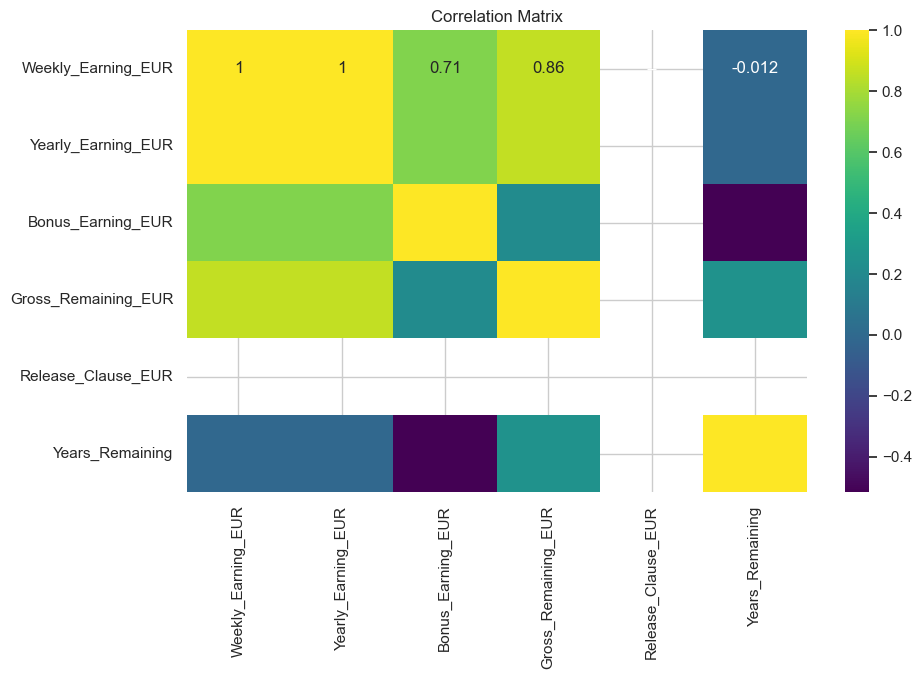

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[currency_cols + ['Years_Remaining']].corr(), annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

# Visualization
Top 10 Highest Paid Players (Yearly)

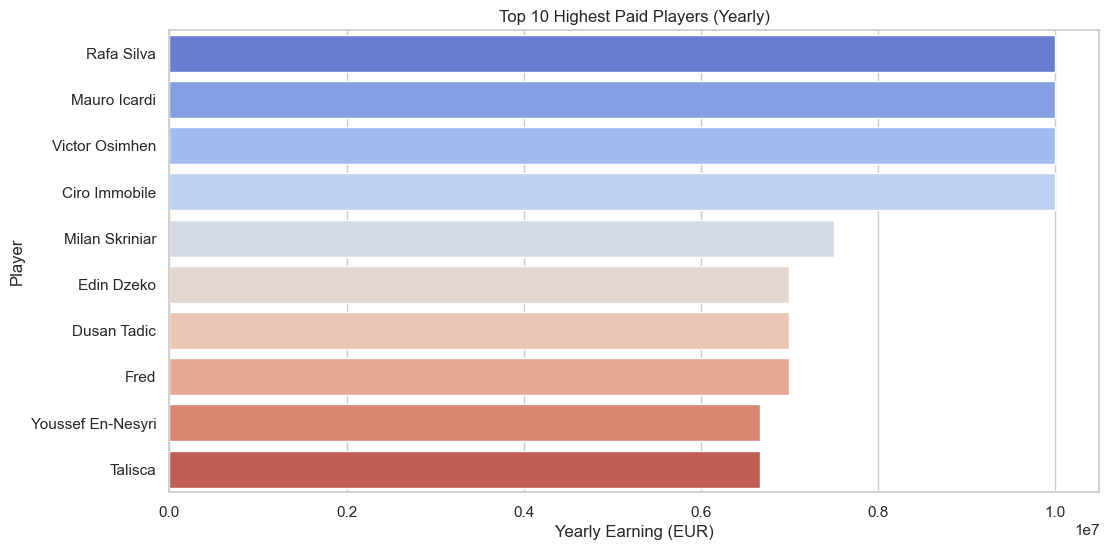

In [11]:
top10 = df.sort_values('Yearly_Earning_EUR', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Yearly_Earning_EUR', y='Player_Name', data=top10, palette='coolwarm')
plt.title("Top 10 Highest Paid Players (Yearly)")
plt.xlabel("Yearly Earning (EUR)")
plt.ylabel("Player")
plt.show()

# Weekly Salary Distribution

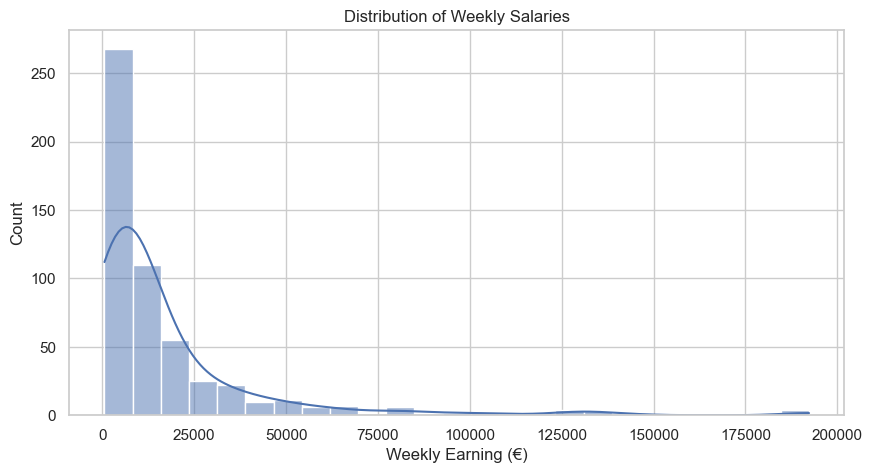

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Weekly_Earning_EUR'], bins=25, kde=True)
plt.title("Distribution of Weekly Salaries")
plt.xlabel("Weekly Earning (€)")
plt.show()

# Bonus vs Yearly Salary

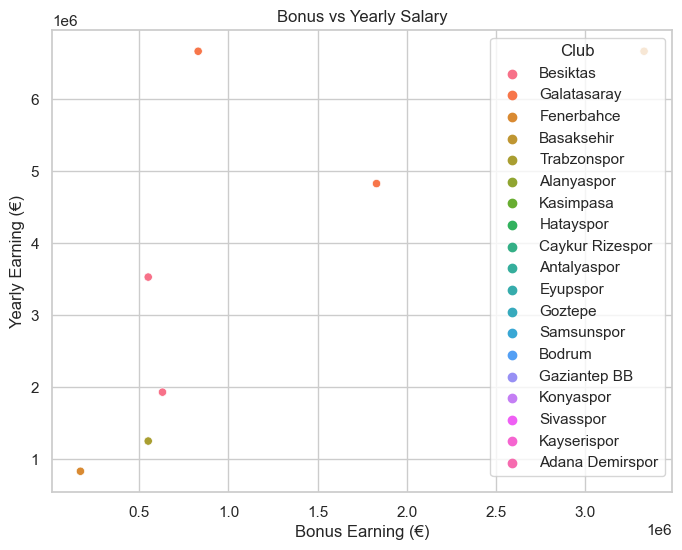

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bonus_Earning_EUR', y='Yearly_Earning_EUR', hue='Club', data=df)
plt.title("Bonus vs Yearly Salary")
plt.xlabel("Bonus Earning (€)")
plt.ylabel("Yearly Earning (€)")
plt.show()

# Contract Duration (in days)

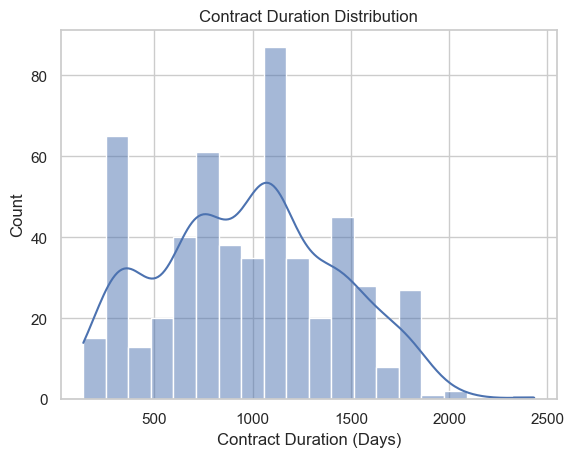

In [14]:
df['Contract_Duration_Days'] = (df['Expiration_Date'] - df['Signing_Date']).dt.days
sns.histplot(df['Contract_Duration_Days'], bins=20, kde=True)
plt.title("Contract Duration Distribution")
plt.xlabel("Contract Duration (Days)")
plt.show()

# Insights & Filtering
Players with High Salary but Short Contract

In [15]:
df[(df['Yearly_Earning_EUR'] > 3000000) & (df['Years_Remaining'] <= 1)][[
    'Player_Name', 'Club', 'Yearly_Earning_EUR', 'Years_Remaining'
]]

,Player_Name,Club,Yearly_Earning_EUR,Years_Remaining
1,Victor Osimhen,Galatasaray,10000000.0,1
4,Milan Skriniar,Fenerbahce,7500000.0,1
5,Edin Dzeko,Fenerbahce,7000000.0,1
7,Dusan Tadic,Fenerbahce,7000000.0,1
16,Dries Mertens,Galatasaray,4830000.0,1
18,Filip Kostić,Fenerbahce,4170000.0,1
19,Fernando Muslera,Galatasaray,4170000.0,1
25,Ismail Jakobs,Galatasaray,3500000.0,1
26,Arthur Masuaku,Besiktas,3400000.0,1


# Players with Missing Bonus or Clause Data

In [16]:
df[df['Bonus_Earning_EUR'].isna() | df['Release_Clause_EUR'].isna()][[
    'Player_Name', 'Club', 'Yearly_Earning_EUR', 'Bonus_Earning_EUR', 'Release_Clause_EUR'
]]

,Player_Name,Club,Yearly_Earning_EUR,Bonus_Earning_EUR,Release_Clause_EUR
0,Rafa Silva,Besiktas,10000000.0,NaN,NaN
1,Victor Osimhen,Galatasaray,10000000.0,NaN,NaN
2,Ciro Immobile,Besiktas,10000000.0,NaN,NaN
3,Mauro Icardi,Galatasaray,10000000.0,NaN,NaN
4,Milan Skriniar,Fenerbahce,7500000.0,NaN,NaN
...,...,...,...,...,...
536,Selimcan Temel,Hatayspor,30000.0,NaN,NaN
537,Şant Kazancı,Kasimpasa,30000.0,NaN,NaN
538,Ognjen Mimovic,Fenerbahce,NaN,NaN,NaN
539,Allan Saint-Maximin,Fenerbahce,NaN,NaN,NaN


# Top Clubs by Total Gross Salary

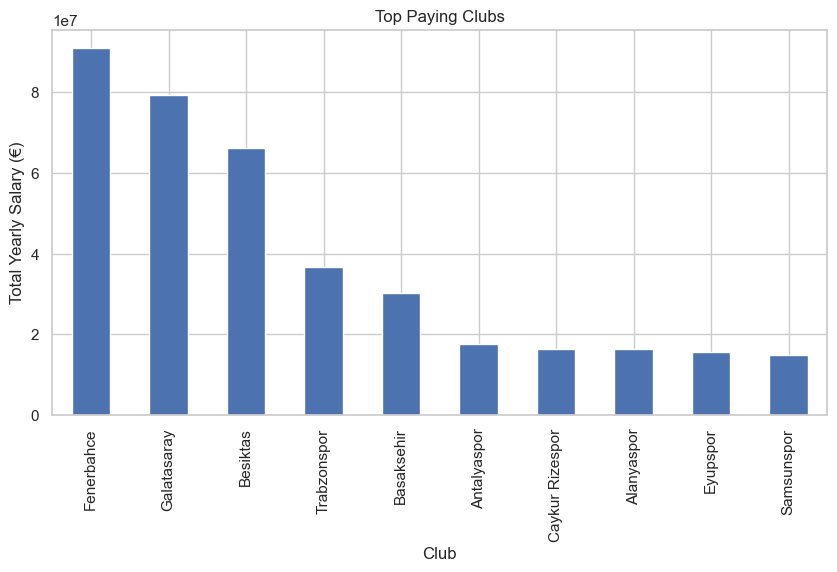

In [17]:
club_salary = df.groupby('Club')['Yearly_Earning_EUR'].sum().sort_values(ascending=False).head(10)
club_salary.plot(kind='bar', figsize=(10,5), title='Top Paying Clubs')
plt.ylabel("Total Yearly Salary (€)")
plt.show()